In [1]:
import cv2 as cv

import numpy as np

from tqdm.notebook import tqdm

from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ls /data/scratch/bariskurtkaya/oxford/

2014-11-14-16-34-33  2014-12-17-18-18-43  2015-09-01-21-16-05
2014-12-10-18-10-50  2015-02-03-19-43-11  2015-09-01-21-44-08
2014-12-16-18-44-24  2015-02-27-18-09-02


In [4]:
!ls /data/scratch/bariskurtkaya/oxford/2014-11-14-16-34-33/stereo/centre/

1415984956291375.png  1415985706252477.png  1415986474961535.png
1415984956353867.png  1415985706314968.png  1415986475024027.png
1415984956416359.png  1415985706377461.png  1415986475086517.png
1415984956478848.png  1415985706439953.png  1415986475149008.png
1415984956541342.png  1415985706502441.png  1415986475211501.png
1415984956603833.png  1415985706564935.png  1415986475273990.png
1415984956666322.png  1415985706627428.png  1415986475336483.png
1415984956728816.png  1415985706689918.png  1415986475398975.png
1415984956791307.png  1415985706752409.png  1415986475461463.png
1415984956853797.png  1415985706814901.png  1415986475523958.png
1415984956916291.png  1415985706877390.png  1415986475586451.png
1415984956978782.png  1415985706939884.png  1415986475648938.png
1415984957041271.png  1415985707002375.png  1415986475711433.png
1415984957103766.png  1415985707064867.png  1415986475773925.png
1415984957166257.png  1415985707127360.png  1415986475836415.png
1415984957228746.png  141

In [2]:
main_dataset_dir = '/data/scratch/bariskurtkaya/oxford'

datasets = glob(main_dataset_dir + '/*')

In [7]:
hist = np.zeros((7,256))

for idx, data_dir in enumerate(datasets):
    for _, data in tqdm(enumerate(glob(data_dir + '/stereo/centre/*'))):
        img = cv.imread(data, 0)
                
        hist[idx] = np.add(hist[idx], np.histogram(img, bins=256, range=(0,256))[0])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

libpng error: Read Error


TypeError: '>=' not supported between instances of 'NoneType' and 'int'

In [10]:
hist_backup = np.copy(hist)

In [9]:
hist.shape

(7, 256)

In [11]:
for idx in range(hist.shape[0]):
    hist[idx] = hist_backup[idx] / np.sum(hist_backup[idx])

hist.shape, np.max(hist), hist_backup.shape, np.max(hist_backup)

((7, 256), 0.3552118163547106, (7, 256), 15713870562.0)

In [22]:
total_hist = np.zeros(256)

for idx in range(7):
    total_hist = np.add(total_hist, hist[idx])

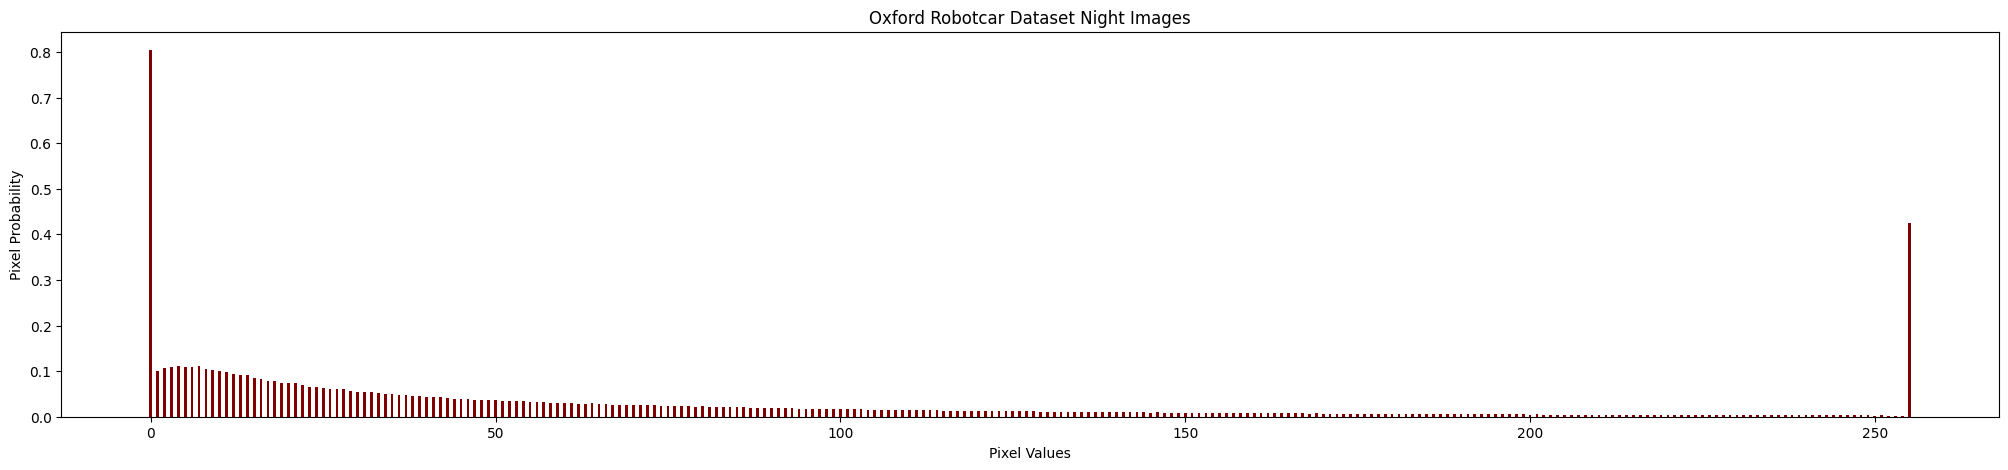

In [23]:
fig = plt.figure(figsize = (25, 5)) 

# creating the bar plot
plt.bar(np.arange(256), total_hist, color ='maroon',
        width = 0.4)
 
plt.xlabel("Pixel Values")
plt.ylabel("Pixel Probability")
plt.title("Oxford Robotcar Dataset Night Images")
plt.show()